## Check if the moments of R are calculated correctly

In [2]:
import numpy as np
from scipy.integrate import quad

def approximate_integral(d, alpha, beta):
    integrand = lambda r: r**d * np.exp(-alpha * (r - beta)**2)
    result, error = quad(integrand, 0, np.inf)
    return result, error

# Example usage
d = 2
alpha = 1.0
beta = 1.0
integral_value = approximate_integral(d, alpha, beta)
print(f"The approximate value of the integral is: {integral_value}")


The approximate value of the integral is: (2.633516307983492, 1.739384184486733e-08)


In [107]:
def approximate_integral_mc(d, alpha, beta, num_samples=1_000_000):
    integrand = lambda r: r**d * np.exp(-alpha * (r - beta)**2)
    
    # Generate random samples
    samples = np.random.rand(num_samples) * 10  # scaling to 10 for better coverage of the integrand

    # Evaluate the integrand at the sampled points
    integrand_values = integrand(samples)
    
    # Compute the Monte Carlo estimate of the integral
    integral_estimate = np.mean(integrand_values) * 10  # scaling factor for integration limit
    return integral_estimate

d = 2
alpha = 1.0
beta = 1.0
integral_value = approximate_integral_mc(d, alpha, beta)
print(f"The approximate value of the integral is: {integral_value}")

The approximate value of the integral is: 2.6364783506546323


In [130]:
import numpy as np
from scipy.stats import expon

def approximate_integral_IS(d, alpha, beta, num_samples=10_000_000):
    integrand = lambda r: r**d * np.exp(-alpha * (r - beta)**2)
    
    # Generate samples from an exponential distribution with scale=1 (mean=1)
    samples = expon.rvs(scale=1, size=num_samples)

    # Evaluate the integrand at the sampled points
    integrand_values = integrand(samples)
    
    # Calculate importance sampling weights (exponential pdf for exponential distribution)
    weights = expon.pdf(samples, scale=1)

    # Compute the weighted Monte Carlo estimate of the integral
    integral_estimate = np.mean(integrand_values / weights)
    return integral_estimate

# Example usage
d = 2
alpha = 1.0
beta = 1.0
integral_value = approximate_integral_IS(d, alpha, beta)
print(f"The approximate value of the integral is: {integral_value}")


The approximate value of the integral is: 2.6340621530535238


In [48]:
from r_dist import R

r_var = R(d, alpha, beta)

print(r_var.compute_Id(order=d))


2.6335163079834985


In [55]:
def test_integral_functions(num_tests, upper_limit=10):
    for _ in range(num_tests):
        # Generate random integers for d, alpha, and beta in the range 1 to 100
        d = np.random.randint(1, 5)
        alpha = np.random.uniform(0.2, 10)
        beta = np.random.uniform(-5, -0.2)
        
        # Compute the integral using both functions
        # result1, error = approximate_integral_mc(d, alpha, beta)
        # print(f"error: {error}")

        result1, error = approximate_integral(d, alpha, beta) #, num_samples=1_000_000)
        
        r_var = R(d, alpha, beta)
        result2 = r_var.compute_Id(order=d)
        
        # Compare the results
        print(f"Test with d={d}, alpha={alpha}, beta={beta}")
        print(f"Result from first function: {result1}")
        print(f"Result from second function: {result2}")
        print(f"Difference: {abs(result1 - result2)}\n")
        
        # Check if the results are sufficiently close (tolerance can be adjusted)
        if not np.isclose(result1, result2, atol=1e-1):
            print("Results are not the same within the tolerance limit.")
            print()
            print(f"alpha={alpha}, beta={beta}, d={d}")
            print(f"Result from first function: {result1}")
            print(f"Result from second function: {result2}")
            return False
        
    print("All tests passed. The functions give the same results within the tolerance limit.")
    return True

In [56]:
test_integral_functions(num_tests=20, upper_limit=10)

Test with d=3, alpha=3.3750672000349637, beta=-4.565120998509653
Result from first function: 1.762608087456714e-36
Result from second function: 1.762608087591331e-36
Difference: 1.3461713557968105e-46

Test with d=2, alpha=9.390024534189546, beta=-2.5552425565413706
Result from first function: 4.0789635223612585e-32
Result from second function: 4.078963521422542e-32
Difference: 9.387167040780919e-42

Test with d=4, alpha=2.2830304788890627, beta=-2.0302741865951544
Result from first function: 1.545715165134283e-08
Result from second function: 1.5457151651632196e-08
Difference: 2.8936763060575035e-19

Test with d=1, alpha=8.363697295878378, beta=-2.8934883237809
Result from first function: 1.6238358954991162e-34
Result from second function: 1.6238358954789648e-34
Difference: 2.015136298703431e-45

Test with d=4, alpha=9.46319998278343, beta=-2.429905407553719
Result from first function: 5.566103722003938e-32
Result from second function: 5.566103709213708e-32
Difference: 1.27902302142735

True

In [131]:
# Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
# Result from first function: 141.67645243131028
# Result from second function: 175.18344259211426
# Difference: 33.50699016080398

for _ in range(10):
    d = 2
    alpha = 0.7261146885967156
    beta = 9.139609894027606

    result1 = approximate_integral_IS(d, alpha, beta)
            
    r_var = R(d, alpha, beta)
    result2 = r_var.compute_Id(order=d)

    print(f"Test with d={d}, alpha={alpha}, beta={beta}")
    print(f"Result from first function: {result1}")
    print(f"Result from second function: {result2}")
    print(f"Difference: {abs(result1 - result2)}\n")


Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
Result from first function: 178.9528291541819
Result from second function: 175.18344259211426
Difference: 3.7693865620676377

Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
Result from first function: 172.8390403958945
Result from second function: 175.18344259211426
Difference: 2.344402196219761

Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
Result from first function: 174.93486600449936
Result from second function: 175.18344259211426
Difference: 0.24857658761490597

Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
Result from first function: 178.19943108058808
Result from second function: 175.18344259211426
Difference: 3.0159884884738233

Test with d=2, alpha=0.7261146885967156, beta=9.139609894027606
Result from first function: 171.2233224556017
Result from second function: 175.18344259211426
Difference: 3.9601201365125576

Test with d=2, alpha=0.7261146885967156, beta=9.

In [76]:
r_var = R(1, 3.0, 0.27)


print(r_var.compute_Id(order=d+1) / r_var.compute_Id(order=d))

0.787494831284444


In [78]:
r_var = R(1, 3.0, 0.27)

r_var.update_moments()

print()
print(r_var.first_moment)

AttributeError: 'R' object has no attribute 'alpha'

In [80]:
from dataset import Synthetic_data

μ_1 = np.array([0.75,0.25])
μ_2 = np.array([0.25, 0.75])

μ_1 = μ_1 / np.linalg.norm(μ_1)
μ_2 = μ_2 / np.linalg.norm(μ_2)

cov_1 = np.array([[0.1, 0.05], [0.05, 0.1]])
cov_2 = np.array([[0.1, 0.05], [0.05, 0.1]])

gamma_prior_cov = np.array([0.1])

ν = cov_1[1,1]

# α = 7
# β = 2
# prior = lambda : beta.rvs(α, β)

prior = lambda : 0.5

ds = Synthetic_data(μ_1, μ_2, prior, N_t=1000)

# ds.dataset_vi(max_iter=3)   

ds.gaussian_mm_init()

assumed_dof = ds.sigma_star_vars[0].dof
print(f"==>> assumed_dof: {assumed_dof}")

print(f"==>> ds.gamma_vars[0].prior_cov: {ds.gamma_vars[0].prior_cov}")

print(f"==>> ds.sigma_star_vars[0].prior_scale: {ds.sigma_star_vars[0].prior_scale}")
print(f"==>> ds.sigma_star_vars[0].scale: {ds.sigma_star_vars[0].scale}")

for i in range(0,len(ds.z_vars)):
    ds.z_vars[i].probs = [0.0, 1.0] if i % 2 == 0 else [1.0, 0.0]


ds.means_vars[0].prior_cov = cov_1
ds.means_vars[0].mean = μ_1
ds.means_vars[0].cov = cov_1

ds.gamma_vars[0].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[0].mean = np.array([cov_1[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[0].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[0].nu = cov_1[-1,-1]

ds.sigma_star_vars[0].prior_scale = np.array([cov_1[0,0] * (assumed_dof - ds.d)])
ds.sigma_star_vars[0].scale = np.array([cov_1[0,0] - ds.gamma_vars[0].mean ** 2])
ds.sigma_star_vars[0].nu = cov_1[-1,-1]                


ds.means_vars[1].prior_cov = cov_2[1,1]
ds.means_vars[1].mean = μ_2
ds.means_vars[1].cov = cov_2

ds.gamma_vars[1].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[1].mean = np.array([cov_2[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[1].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[1].nu = cov_2[-1,-1]

ds.sigma_star_vars[1].prior_scale = np.array([cov_2[0,0] - ds.gamma_vars[0].mean ** 2])
ds.sigma_star_vars[1].scale = np.array([[cov_2[0,0] * (assumed_dof - ds.d)]])
ds.sigma_star_vars[1].nu = cov_2[-1,-1]

full_sigma_inv_estimates = [np.linalg.inv(cov_mat) for cov_mat in [cov_1, cov_2]]

for i, (r_var, label) in enumerate(zip(ds.r_vars, ds.gmm.labels)):
    curr_data = ds.normed_embds[i]

    # r_var.alpha = np.random.uniform(3.0, 3.5)
    # r_var.beta = np .random.uniform(0.2, 0.3)
    # r_var.update_moments()



    r_var.alpha = 0.5 * np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], curr_data))

    beta_numerator = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], ds.means_vars[label].mean)) 
    beta_denom = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[label], curr_data))

    r_var.beta = beta_numerator / beta_denom

    r_var.update_moments()
    
    # initialise phi variables

for k in range(ds.K):
    # count number of labels in group k
    num_labels = sum([1 for lab in ds.gmm.labels if lab == k])
    ds.phi_var.conc[k] = num_labels + ds.phi_var.prior_conc[k]


ds.dataset_vi(max_iter=3, run_init=False)


sigma inv estimates: [array([[2308.52384872,  789.46377181],
       [ 789.46377181,  281.73765424]]), array([[ 267.82250586,  742.30308344],
       [ 742.30308344, 2151.8604076 ]])]
==>> assumed_dof: 5
==>> ds.gamma_vars[0].prior_cov: [[0.01719058]]
==>> ds.sigma_star_vars[0].prior_scale: [[0.00625049]]
==>> ds.sigma_star_vars[0].scale: [[0.00129953]]
Initial values:
                  
                    μ_0_mean: [0.9486833  0.31622777]
                    μ_0_cov: [[0.1  0.05]
 [0.05 0.1 ]]

                    μ_1_mean: [0.31622777 0.9486833 ]
                    μ_1_cov: [[0.1  0.05]
 [0.05 0.1 ]]

                 _____________________________________________________________________

                    sigma_0_scale: [[0.075]]
                    sigma_0_dof: 5

                    sigma_1_scale: [[0.3]]
                    sigma_1_dof: 5

                _____________________________________________________________________

                    gamma_0_mean: [0.15811388]
       

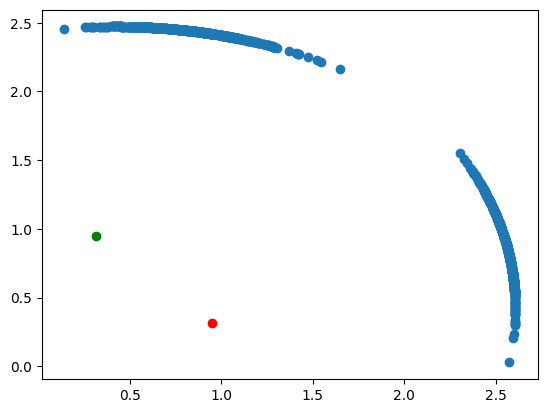

In [88]:
import numpy as np
import matplotlib.pyplot as plt



points_vec = []
for i in range(0,len(ds.z_vars)):
    # mean_vec = ds.means_vars[np.argmax(ds.z_vars.probs)].mean
    normed_embd = ds.normed_embds[i]
    r_i_moment = ds.r_vars[i].first_moment
    points_vec.append(normed_embd * r_i_moment)

    # Remove the middle dimension from each array in points_vec
points_vec = [np.squeeze(arr) for arr in points_vec]
points_vec = np.array(points_vec)

x_points = points_vec[:, 0]
y_points = points_vec[:, 1]

plt.scatter(x=x_points, y=y_points)

mean_1 = ds.means_vars[0].mean
mean_2 = ds.means_vars[1].mean

plt.scatter(x=mean_1[0], y=mean_1[1], color='red')
plt.scatter(x=mean_2[0], y=mean_2[1], color='green')


plt.show()


    


    

## Improved Version of the Above Code

In [36]:
from dataset import Dataset
import numpy as np



μ_0 = np.array([-0.75, 0.25])

cov_0 = np.array([[0.1, 0.05], [0.05, 0.1]])

μ_1 = np.array([0.25, 0.75])
cov_1 = np.array([[0.1, 0.05], [0.05, 0.1]])

gamma_prior_cov = np.array([0.1])

ν = cov_0[1,1]

# Number of samples to generate
n_samples = 1000

# Generate samples alternately
samples = np.zeros((n_samples, 2))
for i in range(n_samples):
    if i % 2 == 0:
        samples[i] = np.random.multivariate_normal(μ_0, cov_0)
    else:
        samples[i] = np.random.multivariate_normal(μ_1, cov_1)


ds = Dataset(samples, emb_dim=2, N=1000, K=2)

for i in range(0,len(ds.z_vars)):
    ds.z_vars[i].probs = [1.0, 0.0] if i % 2 == 0 else [0.0, 1.0]

assumed_dof = 5 #= d+3

ds.means_vars[0].prior_cov = cov_0
ds.means_vars[0].mean = μ_0
ds.means_vars[0].cov = cov_0

ds.means_vars[1].prior_cov = cov_1
ds.means_vars[1].mean = μ_1
ds.means_vars[1].cov = cov_1


ds.gamma_vars[0].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[0].mean = np.array([cov_0[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[0].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[0].nu = cov_0[-1,-1]

ds.gamma_vars[1].prior_cov = np.array([gamma_prior_cov / np.sqrt(ν)])
ds.gamma_vars[1].mean = np.array([cov_1[0, 1]]) / np.sqrt(ν)
ds.gamma_vars[1].cov = np.array([gamma_prior_cov / ν])
ds.gamma_vars[1].nu = cov_1[-1,-1]

ds.sigma_star_vars[0].prior_scale = np.array([cov_0[0,0] * (assumed_dof - ds.d)])
ds.sigma_star_vars[0].dof = 5
ds.sigma_star_vars[0].prior_dof = 5
ds.sigma_star_vars[0].scale = np.array([cov_0[0,0] - ds.gamma_vars[0].mean ** 2])
ds.sigma_star_vars[0].nu = cov_1[-1,-1]                


ds.sigma_star_vars[1].prior_scale = np.array([cov_1[0,0] - ds.gamma_vars[1].mean ** 2])
ds.sigma_star_vars[1].dof = 5
ds.sigma_star_vars[1].prior_dof = 5
ds.sigma_star_vars[1].scale = np.array([[cov_1[0,0] * (assumed_dof - ds.d)]])
ds.sigma_star_vars[1].nu = cov_1[-1,-1]

full_sigma_inv_estimates = [np.linalg.inv(cov_mat) for cov_mat in [cov_0, cov_1]]

for i, r_var in enumerate(ds.r_vars):
    curr_data = ds.normed_embds[i]
    r_var.alpha = 0.5 * np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[i%2], curr_data))

    beta_numerator = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[i%2], ds.means_vars[i%2].mean)) 
    beta_denom = np.matmul(curr_data.T, np.matmul(full_sigma_inv_estimates[i%2], curr_data))

    r_var.beta = beta_numerator / beta_denom

    r_var.update_moments()
    
    # initialise phi variables

    ds.phi_var.conc[0] = n_samples // 2
    ds.phi_var.conc[1] = n_samples // 2 


ds.dataset_vi(max_iter=3)




Iteration 0 results:
                  
                    μ_0_mean: [-0.75  0.25]
                    μ_0_cov: [[0.1  0.05]
 [0.05 0.1 ]]

                    μ_1_mean: [0.25 0.75]
                    μ_1_cov: [[0.1  0.05]
 [0.05 0.1 ]]


                 _____________________________________________________________________

                    sigma_0_scale: [[0.075]]
                    sigma_0_dof: 5

                    sigma_1_scale: [[0.3]]
                    sigma_1_dof: 5


                _____________________________________________________________________

                    gamma_0_mean: [0.15811388]
                    gamma_0_cov: [[1.]]

                    gamma_1_mean: [0.15811388]
                    gamma_1_cov: [[1.]]

                _____________________________________________________________________

                    First 10 z probs: [[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0]]



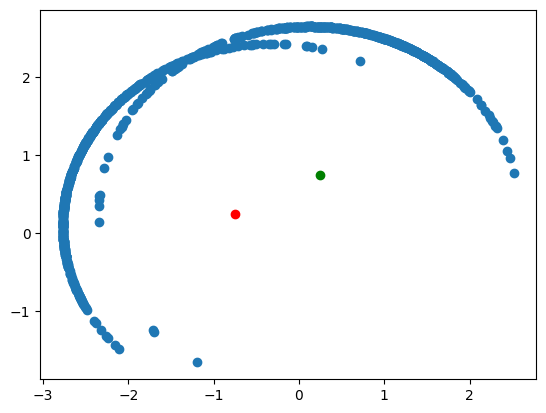

In [37]:
import matplotlib.pyplot as plt

points_vec = []
for i in range(0,len(ds.z_vars)):
    # mean_vec = ds.means_vars[np.argmax(ds.z_vars.probs)].mean
    normed_embd = ds.normed_embds[i]
    r_i_moment = ds.r_vars[i].first_moment
    points_vec.append(normed_embd * r_i_moment)



    # Remove the middle dimension from each array in points_vec
points_vec = [np.squeeze(arr) for arr in points_vec]
points_vec = np.array(points_vec)

x_points = points_vec[:, 0]
y_points = points_vec[:, 1]

plt.scatter(x=x_points, y=y_points)

mean_1 = ds.means_vars[0].mean
mean_2 = ds.means_vars[1].mean

plt.scatter(x=mean_1[0], y=mean_1[1], color='red')
plt.scatter(x=mean_2[0], y=mean_2[1], color='green')


plt.show()

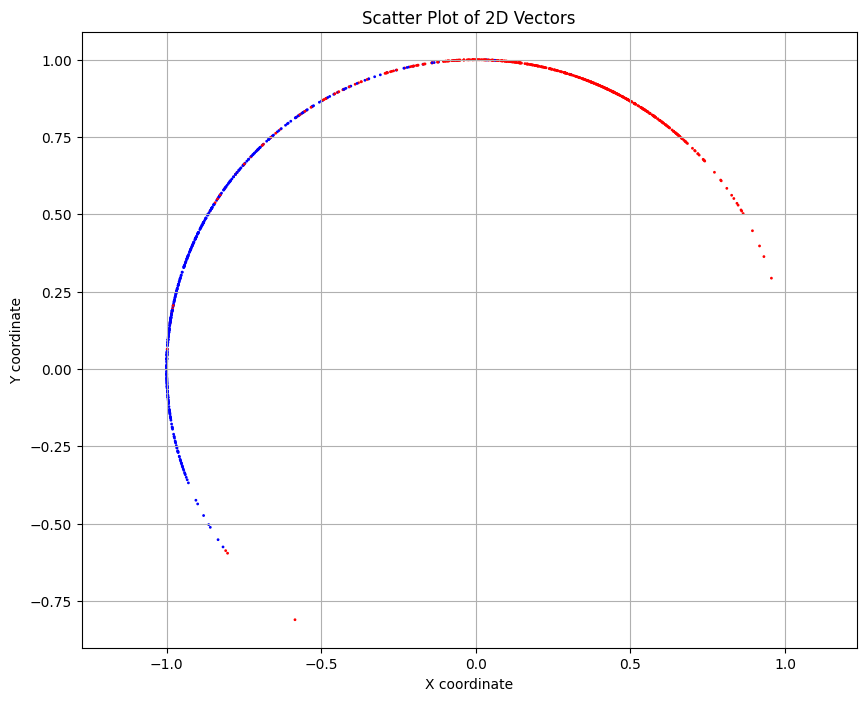

In [38]:
import matplotlib.pyplot as plt

# Assuming ds.normed_embds is your list of 2D vectors
normed_embds = ds.normed_embds

# Extract the x and y coordinates from the 2D vectors
x_coords = [vec[0] for vec in normed_embds]
y_coords = [vec[1] for vec in normed_embds]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=['blue','red']*500, s=1)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of 2D Vectors')
plt.grid(True)
plt.axis('equal')  # Ensure the axis are equal
plt.show()





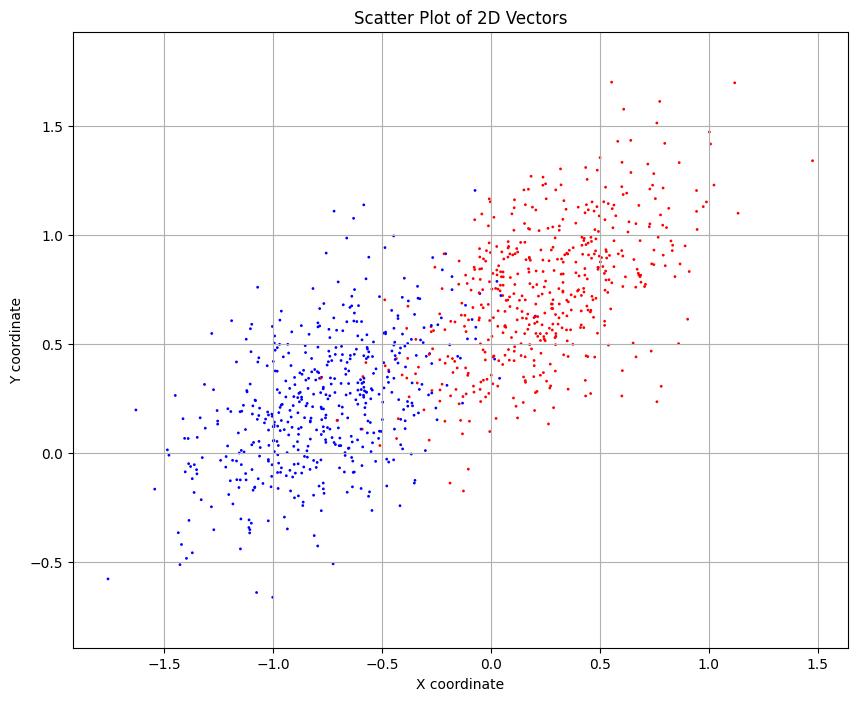

In [40]:
import matplotlib.pyplot as plt

# Assuming ds.normed_embds is your list of 2D vectors
normed_embds = ds.embds

# Extract the x and y coordinates from the 2D vectors
x_coords = [vec[0] for vec in normed_embds]
y_coords = [vec[1] for vec in normed_embds]

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=['blue','red']*500, s=1)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of 2D Vectors')
plt.grid(True)
plt.axis('equal')  # Ensure the axis are equal
plt.show()

In [28]:
normed_embds = ds.normed_embds
embds = ds.embds

print("_____embds_____")
print()
print(embds[:10])
print()
print("_____normed_embds_____")
print(normed_embds[:10])

_____embds_____

[[0.46891611 0.88269616]
 [0.57444327 1.02492139]
 [0.8056611  0.23346223]
 [0.07506944 0.63043812]
 [0.86592225 1.06024639]
 [0.06412177 1.31297364]
 [1.02982738 0.79637393]
 [0.79122081 0.81247393]
 [0.98803296 1.06501955]
 [0.50126757 0.53745065]]

_____normed_embds_____
[[0.46914256 0.88312245]
 [0.48891906 0.87232915]
 [0.96048636 0.27832707]
 [0.11823973 0.99298508]
 [0.6325584  0.77451267]
 [0.04877892 0.9988096 ]
 [0.79106261 0.61173519]
 [0.69767452 0.71641487]
 [0.68011327 0.73310705]
 [0.68206148 0.73129483]]


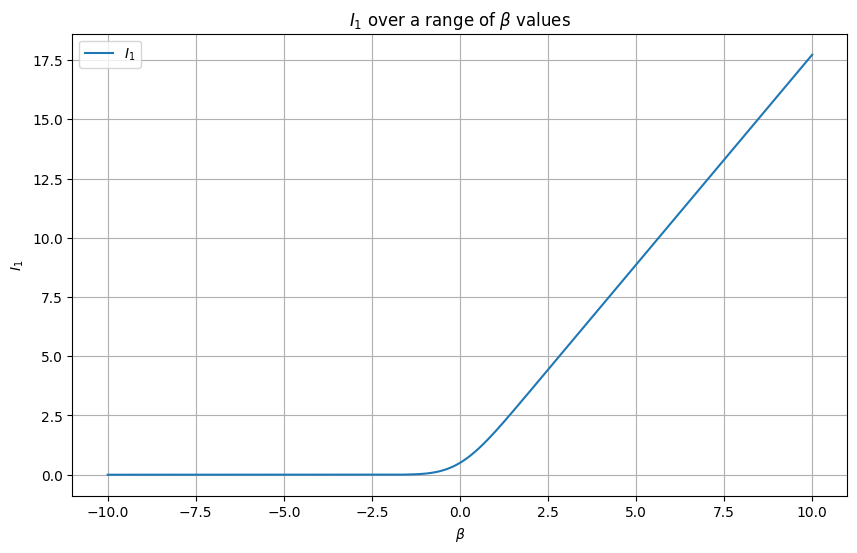

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def compute_I_0(alpha, beta):
    return np.sqrt(np.pi / alpha) * norm.cdf(beta * np.sqrt(2 * alpha))

def compute_I_1(alpha, beta):
    I_0 = compute_I_0(alpha, beta)
    I_1 = beta * I_0 + np.exp(-alpha * beta**2) / (2 * alpha)
    return I_1

def plot_I_1_over_beta(alpha, beta_range):
    beta_values = np.linspace(beta_range[0], beta_range[1], 1000)
    I_1_values = [compute_I_1(alpha, beta) for beta in beta_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(beta_values, I_1_values, label='$I_1$')
    plt.xlabel('$\\beta$')
    plt.ylabel('$I_1$')
    plt.title('$I_1$ over a range of $\\beta$ values')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
alpha = 1.0
beta_range = (-10, 10)
plot_I_1_over_beta(alpha, beta_range)


alpha: 2.621780831931537, beta: 2.0807257779604544
alpha: 6.655000144869414, beta: -4.7941550570419755
alpha: 5.123957592679836, beta: 4.699098521619943
alpha: 4.190609389379256, beta: 3.324426408004218
alpha: 1.0921304830970557, beta: -2.8766088932172384
alpha: 1.0919616423534184, beta: -3.181750327928994
alpha: 0.4065852851773962, beta: -3.165954901465662
alpha: 6.063233020424546, beta: -1.9575775704046228
alpha: 4.207805082202461, beta: 0.24756431632237863


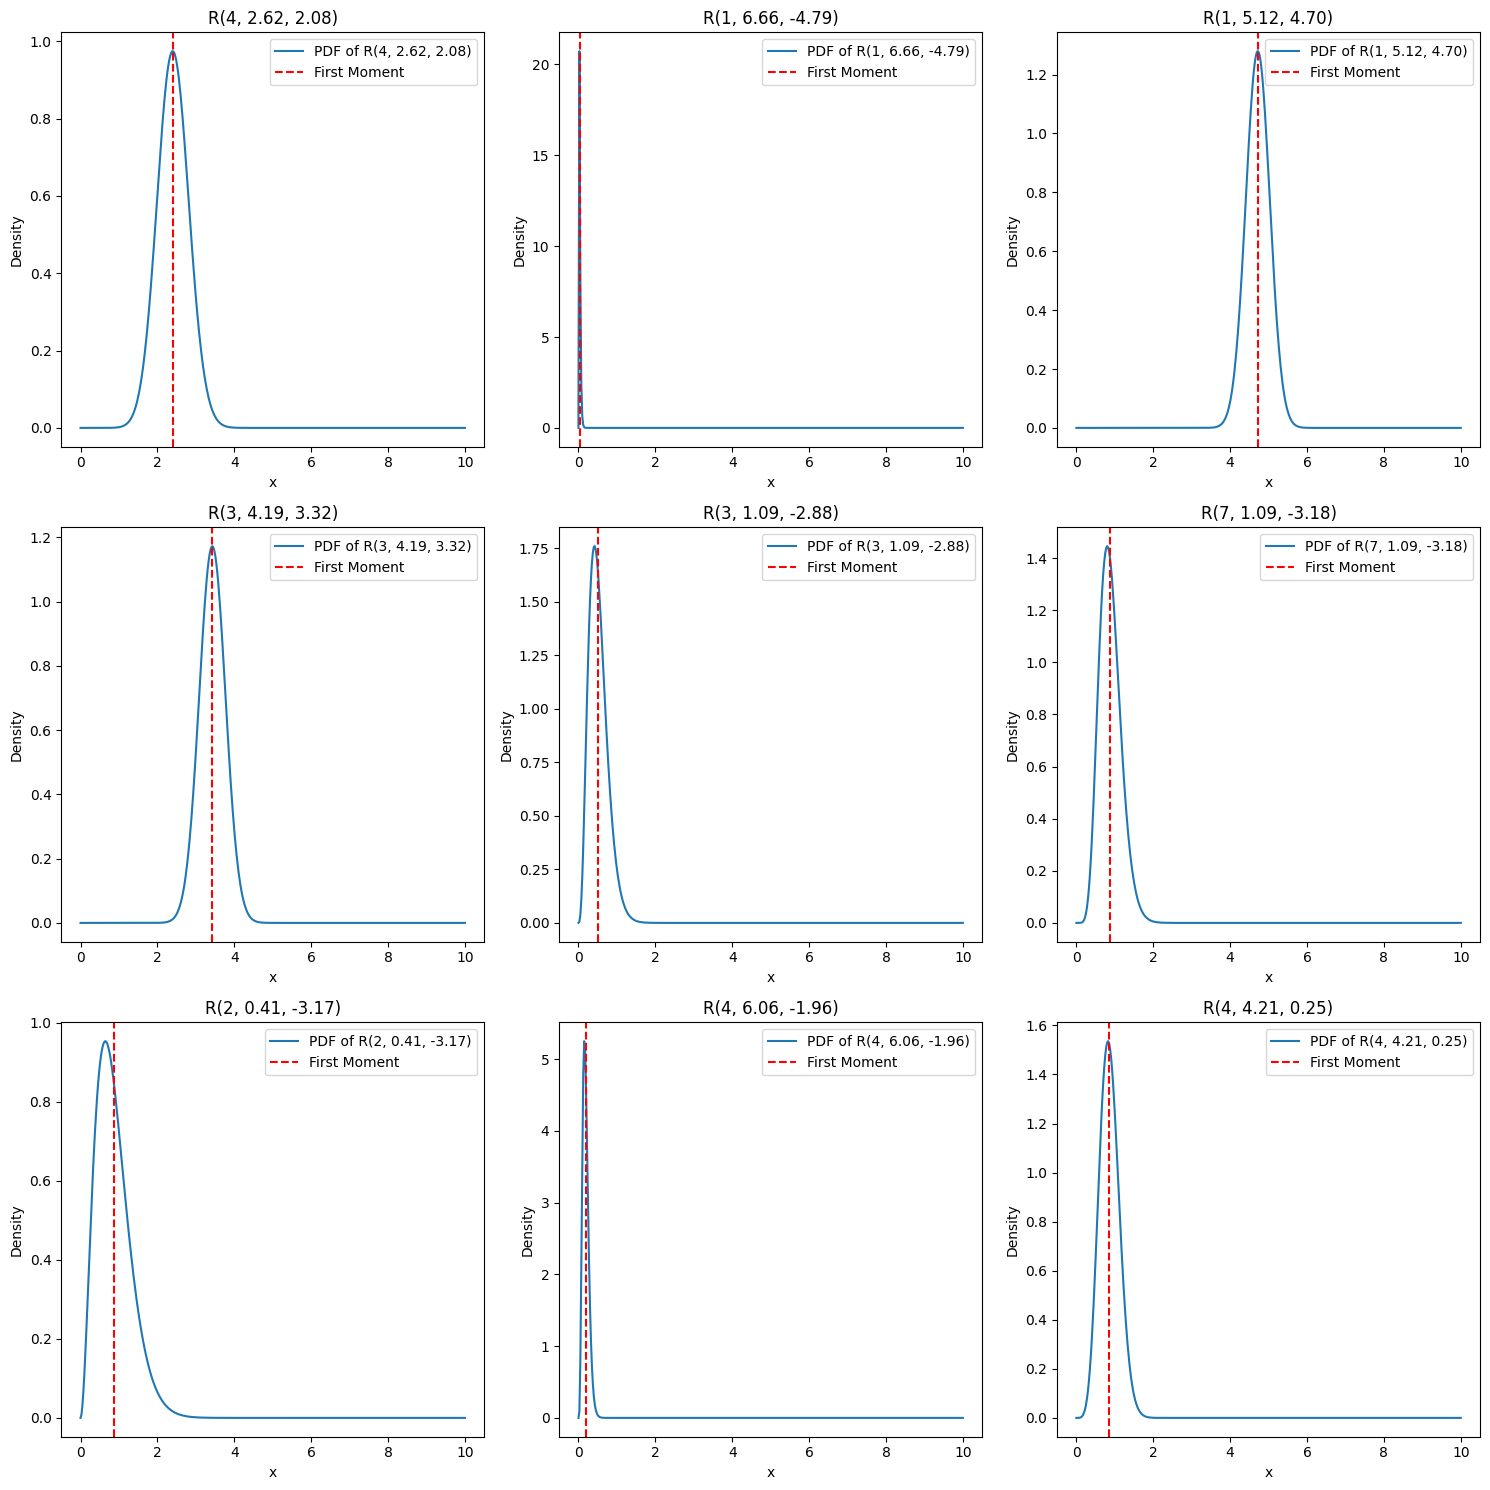

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from r_dist import R

np.random.seed(42)  # For reproducibility
alphas = np.random.uniform(0, 7, 9)
betas = np.random.uniform(-5, 5, 9)

# Define the range of x values for plotting the PDF
x_values = np.linspace(0, 10, 400)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i in range(9):
    d = np.random.randint(1, 8)  # d in [1, 7]
    alpha = alphas[i]
    beta = betas[i]
    
    print(f"alpha: {alpha}, beta: {beta}")

    distribution = R(d, alpha, beta)
    pdf_values = distribution.pdf(x_values)
    
    axes[i].plot(x_values, pdf_values, label=f'PDF of R({d}, {alpha:.2f}, {beta:.2f})')
    axes[i].axvline(distribution.first_moment, color='red', linestyle='--', label='First Moment')
    axes[i].legend()
    axes[i].set_title(f'R({d}, {alpha:.2f}, {beta:.2f})')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()